In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

file_path = '/content/drive/MyDrive/2015-12-28_164554_99.log.part01_sorted.csv'
data = pd.read_csv(file_path)

# Preprocessing Steps:

# 1. Handling Missing Values
# Using mean imputation for numerical columns
imputer = SimpleImputer(strategy='mean')
for col in data.select_dtypes(include=['float64', 'int64']):
    data[col] = imputer.fit_transform(data[[col]])

# 2. Encoding Categorical Variables
# Using Label Encoding for simplicity
for col in data.select_dtypes(include=['object']).columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# 3. Feature Scaling
# Standardizing the features as SVMs are sensitive to the scale of the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=[data.columns[-1]]))  # Assuming last column is target

# 4. Splitting the Dataset
# Separating features (X) and target variable (y)
X = scaled_features
y = data[data.columns[-1]].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)


Training Set: (47740, 19) (47740,)
Testing Set: (20461, 19) (20461,)


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Ensure y_train is a pandas Series
y_train_series = pd.Series(y_train)

# Check if y_train is numeric and needs conversion
if y_train_series.dtype == 'float' or y_train_series.dtype == 'int':
    # Convert to 'category' if it's likely categorical (based on unique value count)
    if len(y_train_series.unique()) < 10:  # Adjust the threshold based on your data
        y_train_series = y_train_series.astype('category')

# If y_train is non-numeric or has been converted, use label encoding
if y_train_series.dtype == 'object' or y_train_series.dtype.name == 'category':
    le = LabelEncoder()
    y_train_series = le.fit_transform(y_train_series)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train_series)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.08802111333756904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1821
         1.0       0.00      0.00      0.00     18640
         2.0       0.00      0.00      0.00         0

    accuracy                           0.09     20461
   macro avg       0.33      0.33      0.33     20461
weighted avg       0.09      0.09      0.09     20461



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
pip install pandas matplotlib seaborn


NameError: ignored

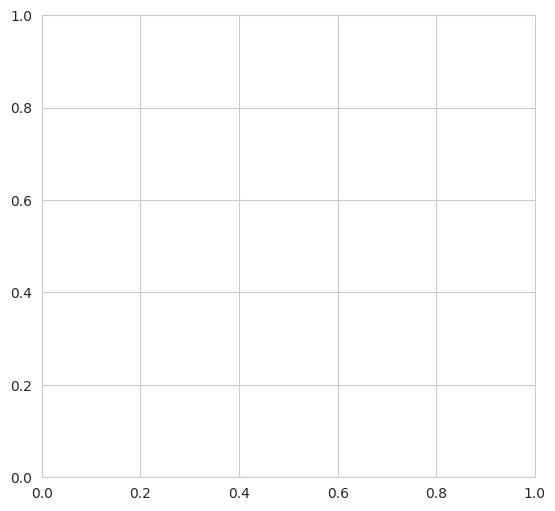

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of various features
# Here we choose 'Modbus_Function_Code' and 'service' as examples
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset['Modbus_Function_Code'], kde=False, bins=30)
plt.title('Distribution of Modbus Function Codes')
plt.xlabel('Modbus Function Code')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(dataset['service'], kde=False, bins=30)
plt.title('Distribution of Service Ports')
plt.xlabel('Service Port')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Pie chart for protocol types
protocol_counts = dataset['proto'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(protocol_counts, labels=protocol_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Protocol Types')
plt.show()

# Network activity over time
# Assuming 'date' and 'time' can be combined into a datetime object for plotting
dataset['datetime'] = pd.to_datetime(dataset['date'] + ' ' + dataset['time'])
dataset.set_index('datetime', inplace=True)
activity_over_time = dataset.resample('D').size()  # Resampling by day ('D')

plt.figure(figsize=(12, 6))
activity_over_time.plot()
plt.title('Network Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Activities')
plt.show()





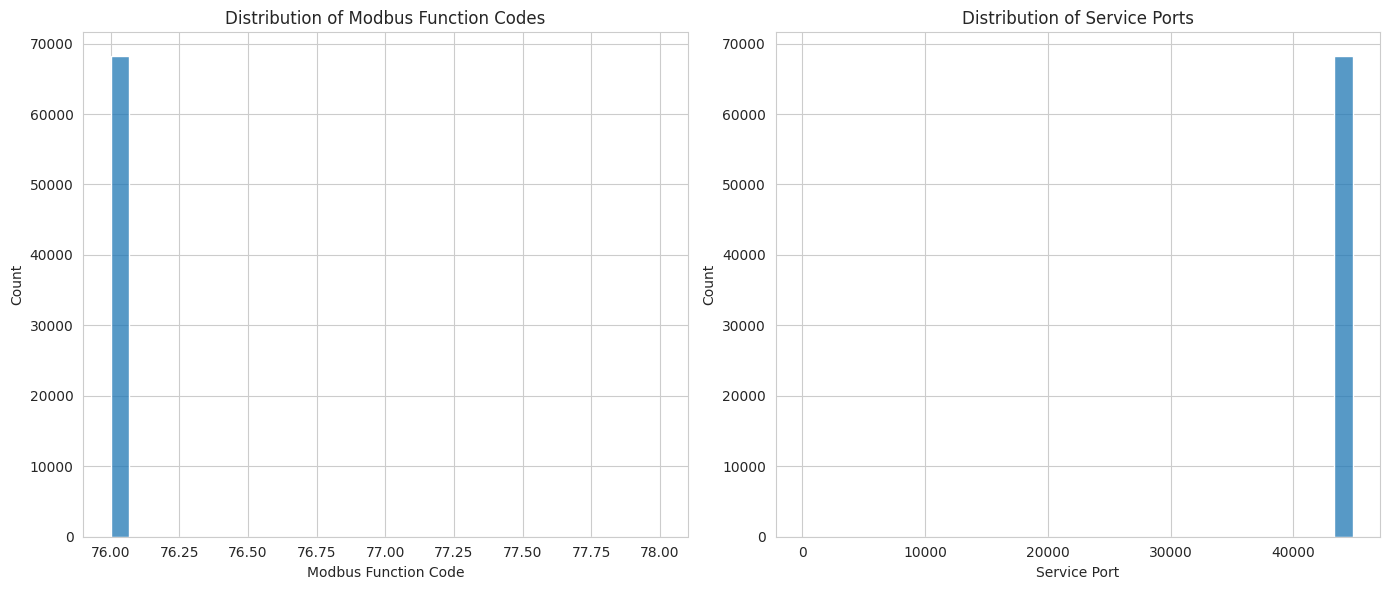

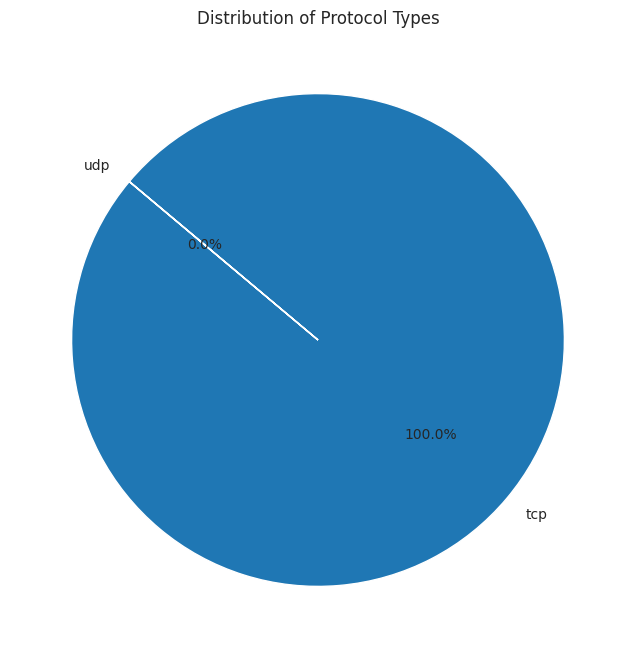

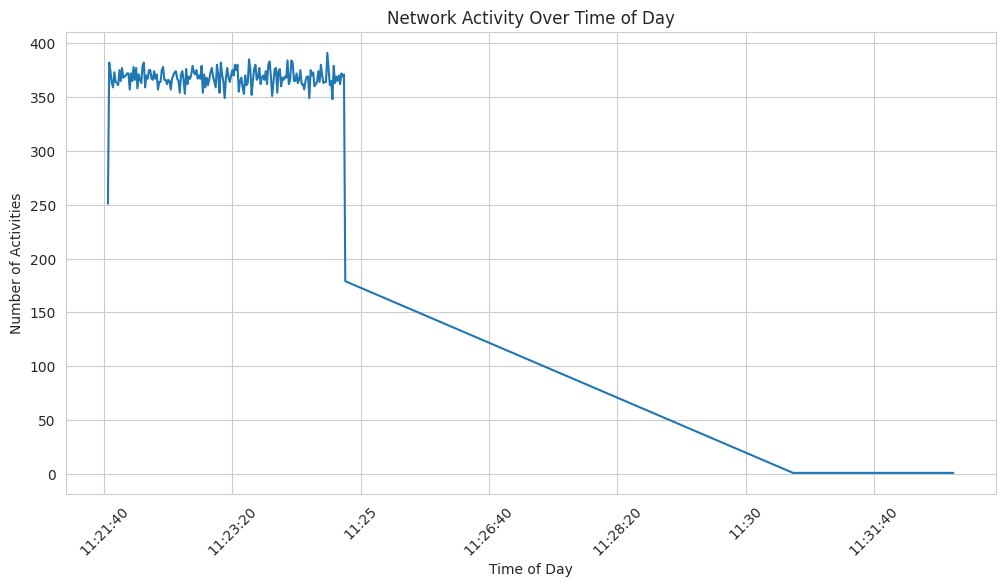

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/2015-12-28_164554_99.log.part01_sorted.csv'
dataset = pd.read_csv(file_path)

# Plotting the distribution of various features
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset['Modbus_Function_Code'], kde=False, bins=30)
plt.title('Distribution of Modbus Function Codes')
plt.xlabel('Modbus Function Code')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(dataset['service'], kde=False, bins=30)
plt.title('Distribution of Service Ports')
plt.xlabel('Service Port')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Pie chart for protocol types
protocol_counts = dataset['proto'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(protocol_counts, labels=protocol_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Protocol Types')
plt.show()

# Network activity over time based on 'time' column
dataset['time'] = pd.to_datetime(dataset['time'], format='%H:%M:%S').dt.time
time_counts = dataset['time'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
time_counts.plot()
plt.title('Network Activity Over Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Activities')
plt.xticks(rotation=45)  # Rotates X-axis labels for better readability
plt.show()



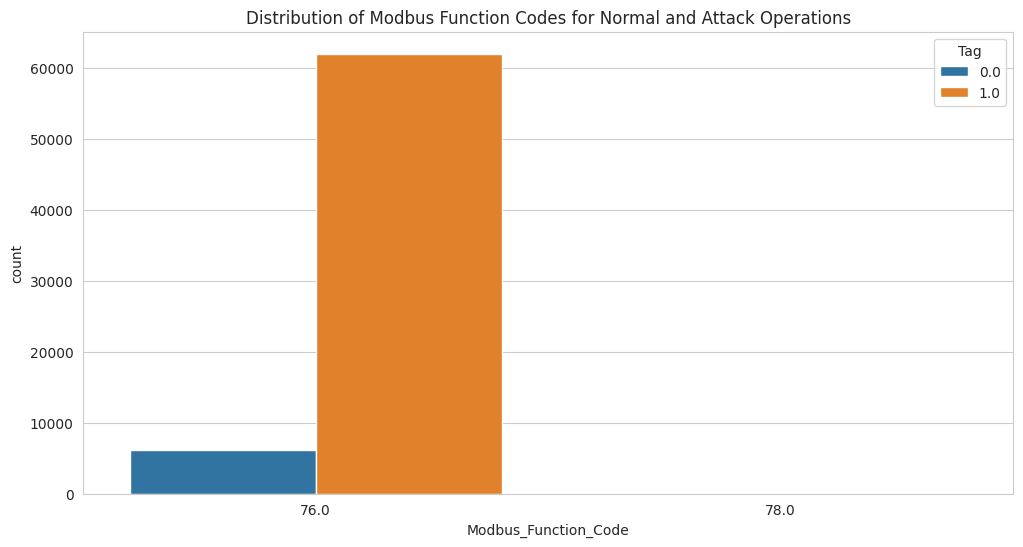

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dataset is already loaded into a DataFrame called 'dataset'

# Analyzing the distribution of Modbus Function Codes for different Tags
plt.figure(figsize=(12, 6))
sns.countplot(x='Modbus_Function_Code', hue='Tag', data=dataset)
plt.title('Distribution of Modbus Function Codes for Normal and Attack Operations')
plt.show()

# Similarly, for Modbus Values, if they are categorical or discretized:
# sns.countplot(x='Modbus_Value', hue='Tag', data=dataset)

# For more detailed analysis, consider groupby operations and statistical tests


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load your dataset
dataset = pd.read_csv('/content/drive/MyDrive/2015-12-28_164554_99.log.part01_sorted.csv')

# Convert 'Modbus_Value' to numeric if it's categorical
le = LabelEncoder()
dataset['Modbus_Value'] = le.fit_transform(dataset['Modbus_Value'])

# Drop rows where the target variable is NaN
dataset = dataset.dropna(subset=['Tag'])

# Features and Target
X = dataset[['Modbus_Value', 'Modbus_Function_Code']]
y = dataset['Tag']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imputing missing values in features
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.17      0.28      1821
         1.0       0.92      1.00      0.96     18639

    accuracy                           0.92     20460
   macro avg       0.85      0.58      0.62     20460
weighted avg       0.91      0.92      0.90     20460


Confusion Matrix:
[[  315  1506]
 [   92 18547]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load your dataset
dataset = pd.read_csv('/content/drive/MyDrive/2015-12-28_164554_99.log.part01_sorted.csv')

# Convert 'Modbus_Value' to numeric if it's categorical
le = LabelEncoder()
dataset['Modbus_Value'] = le.fit_transform(dataset['Modbus_Value'])

# Features and Target
X = dataset[['Modbus_Value', 'Modbus_Function_Code']]
y = dataset['Tag']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imputing missing values
imputer = SimpleImputer(strategy='mean')  # You can change the strategy to 'median' or 'most_frequent' if more appropriate
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ValueError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load your dataset
dataset = pd.read_csv('/content/drive/MyDrive/2015-12-28_164554_99.log.part01_sorted.csv')

# Convert 'Modbus_Value' to numeric if it's categorical
le = LabelEncoder()
dataset['Modbus_Value'] = le.fit_transform(dataset['Modbus_Value'])

# Features and Target
X = dataset[['Modbus_Value', 'Modbus_Function_Code']]
y = dataset['Tag']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ValueError: ignored

In [ ]:
from sklearn.ensemble import IsolationForest

# Assuming the same dataset and features as before
X = dataset[['Modbus_Value', 'Modbus_Function_Code']]

# Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(contamination=0.1)  # Adjust contamination parameter as needed
anomalies = iso_forest.fit_predict(X)

# Adding anomaly labels to the dataset
dataset['anomaly'] = anomalies

# Analyzing the anomalies found
print(dataset['anomaly'].value_counts())


ValueError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load your dataset
dataset = pd.read_csv('/content/drive/MyDrive/2015-12-28_164554_99.log.part01_sorted.csv')

# Convert 'Modbus_Value' to numeric if it's categorical
le = LabelEncoder()
dataset['Modbus_Value'] = le.fit_transform(dataset['Modbus_Value'])

# Drop rows where the target variable is NaN
dataset.dropna(subset=['Tag'], inplace=True)

# Features and Target
X = dataset[['Modbus_Value', 'Modbus_Function_Code']]
y = dataset['Tag']

# Check and handle NaN values in features
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities if any
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)  # Impute and reconstruct DataFrame

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check for NaN in y_train and y_test
if y_train.isna().any() or y_test.isna().any():
    raise ValueError("NaN values found in target variable after splitting")

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


<ipython-input-33-42fc2aff43b3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities if any


Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.17      0.28      1821
         1.0       0.92      1.00      0.96     18639

    accuracy                           0.92     20460
   macro avg       0.85      0.58      0.62     20460
weighted avg       0.91      0.92      0.90     20460


Confusion Matrix:
[[  315  1506]
 [   92 18547]]


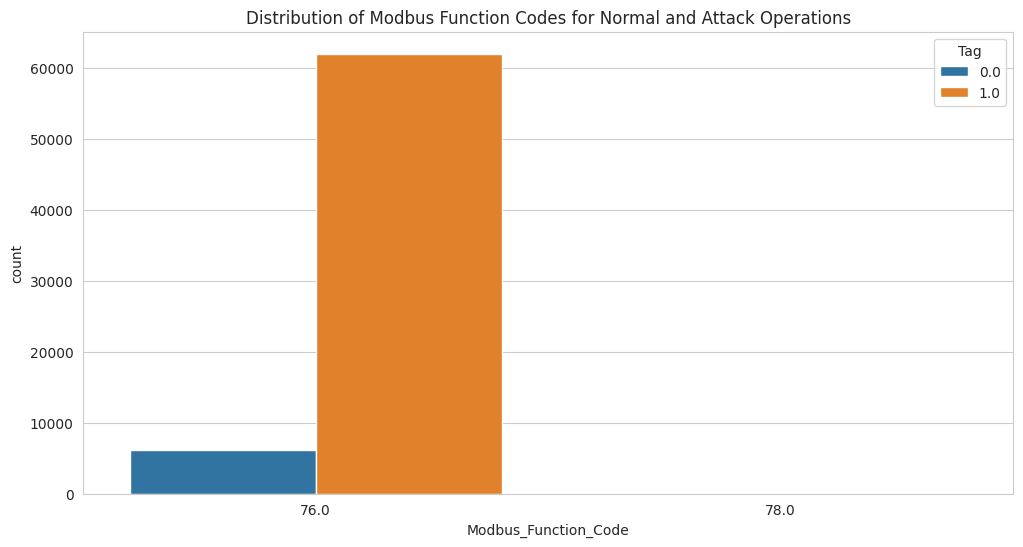

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dataset is already loaded into a DataFrame called 'dataset'

# Analyzing the distribution of Modbus Function Codes for different Tags
plt.figure(figsize=(12, 6))
sns.countplot(x='Modbus_Function_Code', hue='Tag', data=dataset)
plt.title('Distribution of Modbus Function Codes for Normal and Attack Operations')
plt.show()

# Similarly, for Modbus Values, if they are categorical or discretized:
# sns.countplot(x='Modbus_Value', hue='Tag', data=dataset)

# For more detailed analysis, consider groupby operations and statistical tests


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
dataset = pd.read_csv('/content/drive/MyDrive/2015-12-28_164554_99.log.part01_sorted.csv')

# Scatter plot of Modbus Function Code vs Modbus Value, colored by Tag
plt.figure(figsize=(30, 24))
sns.scatterplot(data=dataset, x='Modbus_Function_Code', y='Modbus_Value', hue='Tag')
plt.title('Modbus Function Code vs Modbus Value with Attack Tag')
plt.xlabel('Modbus Function Code')
plt.ylabel('Modbus Value')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Grouping by 'Tag' and getting value counts
function_code_counts = dataset.groupby('Tag')['Modbus_Function_Code'].value_counts()
modbus_value_counts = dataset.groupby('Tag')['Modbus_Value'].value_counts()

# Display the counts
print("Function Code Counts by Tag:")
print(function_code_counts)
print("\nModbus Value Counts by Tag:")
print(modbus_value_counts)


Function Code Counts by Tag:
Tag  Modbus_Function_Code
0    76                      54
Name: Modbus_Function_Code, dtype: int64

Modbus Value Counts by Tag:
Tag  Modbus_Value                                                                                                                                                                                     
0    Number of Elements: 1                                                                                                                                                                                27
     0xeb 0xe5 0x1b 0x40; 0x00 0x00 0x00 0x00; 0x00 0x00 0x00 0x00; 0x00 0x00 0x60 0x40; 0x00 0x00 0x00 0x40; 0x00 0x00 0x00 0x00; 0x00 0x00 0x00 0x00; 0xb5 0x38 0xea 0x43; 2; 0xeb 0xe5 0x1b 0x40; 4     7
     0x6e 0xf1 0x05 0x41; 0x00 0x00 0x00 0x00; 0x00 0x00 0x00 0x00; 0x00 0x00 0x20 0x41; 0x9a 0x99 0xe1 0x40; 0x66 0x66 0xde 0x40; 0x00 0x00 0x40 0x40; 34; 0x6e 0xf1 0x05 0x41                            5
     0x09 0xed 0x55 0x44; 0x0

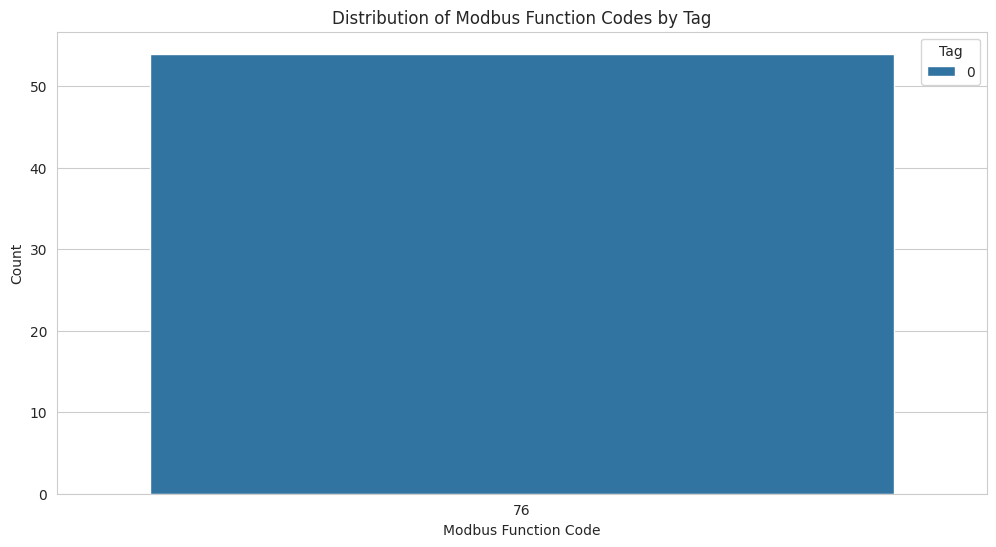

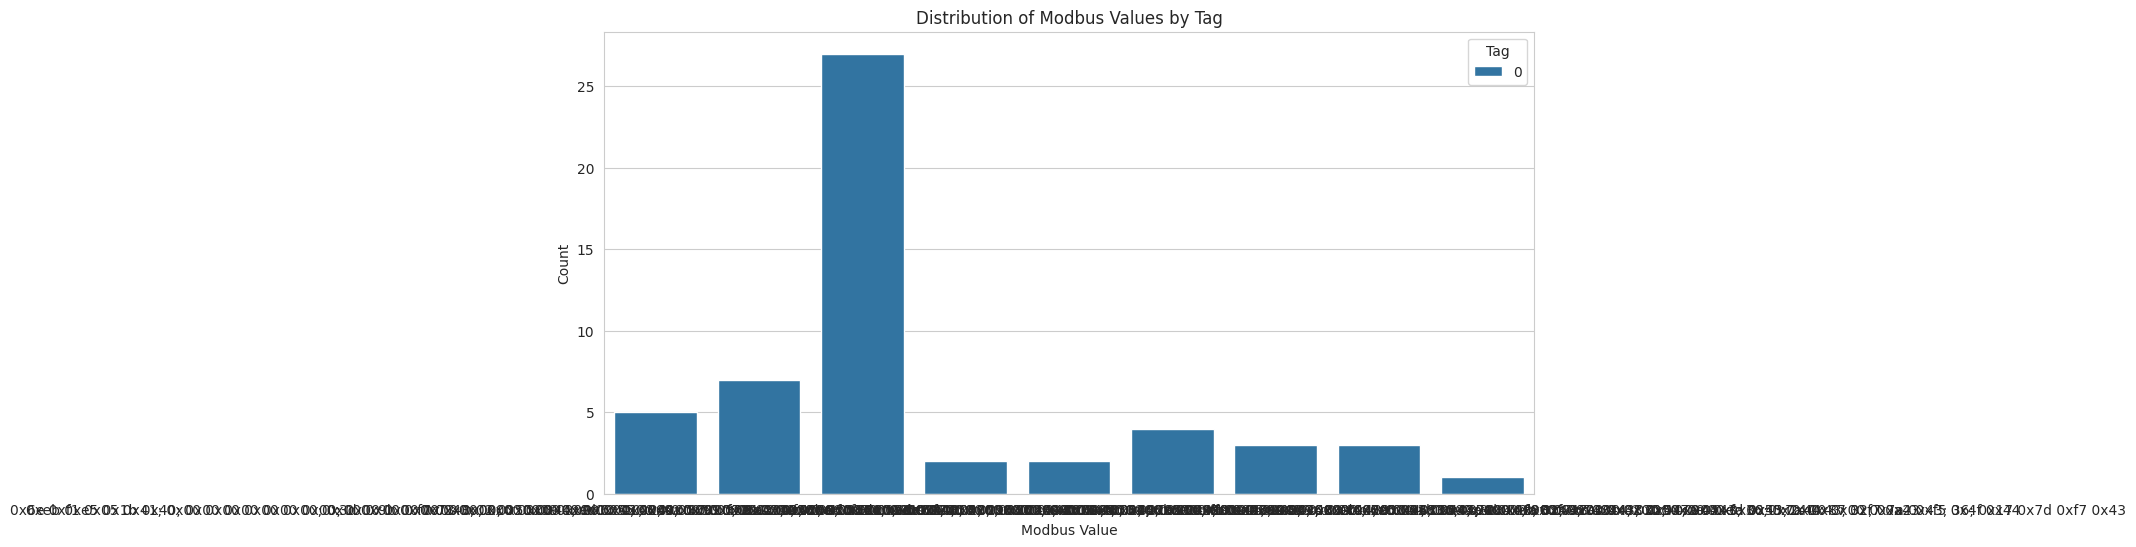

In [ ]:
# Distribution of Modbus Function Code for different Tag values
plt.figure(figsize=(12, 6))
sns.countplot(x='Modbus_Function_Code', hue='Tag', data=dataset)
plt.title('Distribution of Modbus Function Codes by Tag')
plt.xlabel('Modbus Function Code')
plt.ylabel('Count')
plt.show()

# Distribution of Modbus Value for different Tag values
# Note: This plot may be too cluttered if Modbus_Value has many unique values.
plt.figure(figsize=(12, 6))
sns.countplot(x='Modbus_Value', hue='Tag', data=dataset)
plt.title('Distribution of Modbus Values by Tag')
plt.xlabel('Modbus Value')
plt.ylabel('Count')
plt.show()
